## Imports

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', None)

import re

from wordcloud import WordCloud
import contractions

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['font.size'] = 15

import nltk
from nltk.stem.porter import PorterStemmer
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

## Data Load

In [2]:
df_train = pd.read_csv('../Datasets/disaster_tweet/train.csv')
df_train.head(20)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


In [3]:
df_train.tail(20)

,id,keyword,location,text,target
7593,10848,NaN,NaN,I just heard a really loud bang and everyone is asleep great,0
7594,10849,NaN,NaN,A gas thing just exploded and I heard screams and now the whole street smells of gas ... ??,1
7595,10850,NaN,NaN,NWS: Flash Flood Warning Continued for Shelby County until 08:00 PM Wednesday. http://t.co/nZ7ACKRrJi #tnwx,1
7596,10851,NaN,NaN,RT @LivingSafely: #NWS issues Severe #Thunderstorm Warnings for parts of #AR #NC #OK. Expect more trauma cases: http://t.co/FWqfCKNCQW,1
7597,10852,NaN,NaN,#??? #?? #??? #??? MH370: Aircraft debris found on La Reunion is from missing Malaysia Airlines ... http://t.co/5B7qT2YxdA,1
7598,10853,NaN,NaN,Father-of-three Lost Control of Car After Overtaking and Collided #BathAndNorthEastSomerset http://t.co/fa3FcnlN86,1
7599,10854,NaN,NaN,1.3 #Earthquake in 9Km Ssw Of Anza California #iPhone users download the Earthquake app for more information http://t.co/V3aZWOAmzK,1
7600,10855,NaN,NaN,Evacuation order lifted for town of Roosevelt: http://t.co/EDyfo6E2PU http://t.co/M5KxLPKFA1,1
7601,10859,NaN,NaN,#breaking #LA Refugio oil spill may have been costlier bigger than projected http://t.co/5ueCmcv2Pk,1
7602,10860,NaN,NaN,a siren just went off and it wasn't the Forney tornado warning ??,1


### Observation

1. Mixed case
2. Contractions
3. Hashtags and mentions
4. Incorrect spellings
5. Punctuations
6. websites and urls

## Functions

In [4]:
all_text = ' '.join(list(df_train['text']))

def check_texts(check_item, all_text):
    return check_item in all_text

In [5]:
print(check_texts('<a', all_text))
print(check_texts('<div', all_text))
print(check_texts('<p', all_text))

False
False
False


In [6]:
print(check_texts(':)', all_text))
print(check_texts('<3', all_text))
print(check_texts('heard', all_text))

True
False
True


In [7]:
def remove_urls(text):
    ''' This method takes in text to remove urls and website links, if any'''
    url_pattern = r'(www.|http[s]?://)(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    text = re.sub(url_pattern, '', text)
    return text

def remove_html_entities(text):
    ''' This method removes html tags'''
    html_entities = r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});'
    text = re.sub(html_entities, '', text)
    return text

def convert_lower_case(text):
    return text.lower()

def detect_news(text):
    if 'news' in text:
        text = text + ' news'
    return text

def remove_social_media_tags(text):
    ''' This method removes @ and # tags'''
    tag_pattern = r'@([a-z0-9]+)|#'
    text = re.sub(tag_pattern, '', text)
    return text

# Count it before I remove them altogether
def count_punctuations(text):
    getpunctuation = re.findall('[.?"\'`\,\-\!:;\(\)\[\]\\/“”]+?',text)
    return len(getpunctuation)


def preprocess_text(x):
    cleaned_text = re.sub(r'[^a-zA-Z\d\s]+', '', x)
    word_list = []
    for each_word in cleaned_text.split(' '):
        word_list.append(contractions.fix(each_word).lower())
    word_list = [porter_stemmer.stem(each_word.replace('\n', '').strip()) for each_word in word_list]
    word_list = set(word_list) - set(STOPWORDS)
    return " ".join(word_list)

In [8]:
porter_stemmer = PorterStemmer()

df_train['text'] = df_train['text'].apply(remove_urls)
df_train['text'] = df_train['text'].apply(remove_html_entities)
df_train['text'] = df_train['text'].apply(convert_lower_case)
df_train['text'] = df_train['text'].apply(detect_news)
df_train['text'] = df_train['text'].apply(remove_social_media_tags)
df_train['punctuation_count'] = df_train['text'].apply(count_punctuations)
df_train['text'] = df_train['text'].apply(preprocess_text)

df_train['text_tokenized'] = df_train['text'].apply(word_tokenize)
df_train['words_per_tweet'] = df_train['text_tokenized'].apply(len)

In [9]:
df_train

,id,keyword,location,text,target,punctuation_count,text_tokenized,words_per_tweet
0,1,NaN,NaN,thi allah deed reason us may earthquak forgiv,1,0,"[thi, allah, deed, reason, us, may, earthquak, forgiv]",8
1,4,NaN,NaN,fire forest rong sask near canada la,1,1,"[fire, forest, rong, sask, near, canada, la]",7
2,5,NaN,NaN,resid notifi shelter ask place offic evacu order expect,1,3,"[resid, notifi, shelter, ask, place, offic, evacu, order, expect]",9
3,6,NaN,NaN,13000 california peopl wildfir evacu order receiv,1,1,"[13000, california, peopl, wildfir, evacu, order, receiv]",7
4,7,NaN,NaN,rubi thi sent photo smoke wildfir school got alaska pour,1,0,"[rubi, thi, sent, photo, smoke, wildfir, school, got, alaska, pour]",10
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,hold nearbi bridg home giant collaps crane two,1,0,"[hold, nearbi, bridg, home, giant, collaps, crane, two]",8
7609,10870,NaN,NaN,fire ahrari state part california even veri wild northern control troubl,1,2,"[fire, ahrari, state, part, california, even, veri, wild, northern, control, troubl]",11
7610,10871,NaN,NaN,hawaii m194 volcano utc5km 0104,1,6,"[hawaii, m194, volcano, utc5km, 0104]",5
7611,10872,NaN,NaN,portug littl investig seriou collid ebik nonlif car threaten injuri rider polic suffer,1,5,"[portug, littl, investig, seriou, collid, ebik, nonlif, car, threaten, injuri, rider, polic, suffer]",13


## Tweet Length Analysis

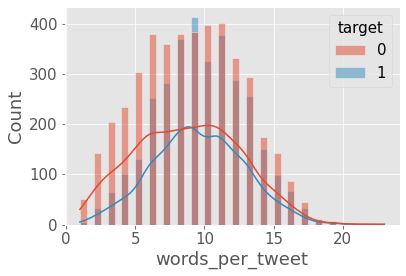

In [10]:
sns.histplot(x='words_per_tweet', hue='target', data=df_train, kde=True)
plt.show()

## Punctuation Analysis

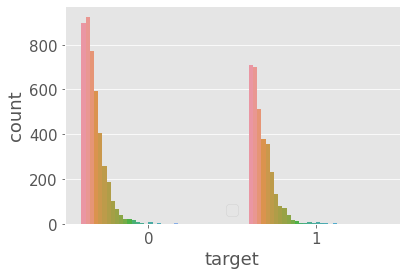

In [11]:
sns.countplot(x='target', hue='punctuation_count', data=df_train)
plt.legend([])
plt.show()

## Tweet Text Analysis using WordCloud

In [12]:
real_disaster_tweets = ' '. join(list(df_train[df_train['target'] == 1]['text']))

In [13]:
non_real_disaster_tweets = ' '. join(list(df_train[df_train['target'] == 0]['text']))

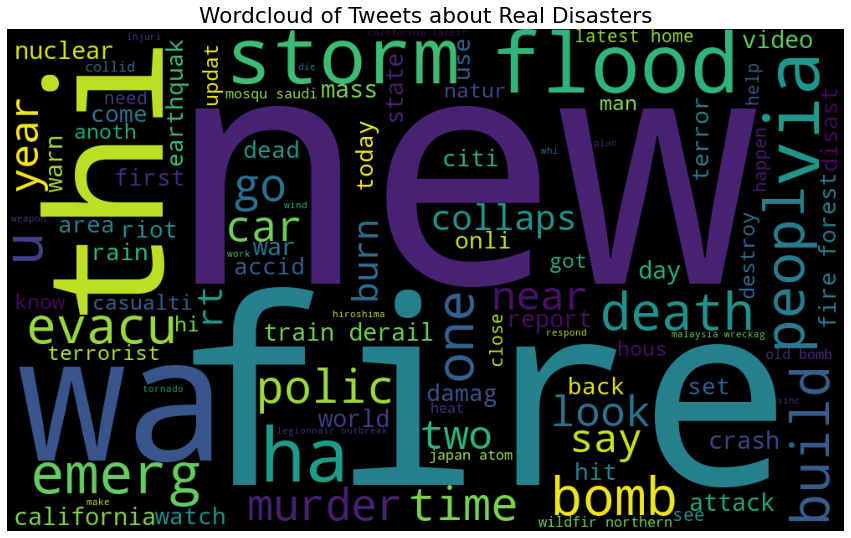

In [14]:
wc = WordCloud(background_color="black", 
               max_words=100, 
               width=1000, 
               height=600, 
               random_state=1).generate(real_disaster_tweets)

plt.figure(figsize=(15,15))
plt.imshow(wc)
plt.axis("off")
plt.title("Wordcloud of Tweets about Real Disasters")
plt.show()

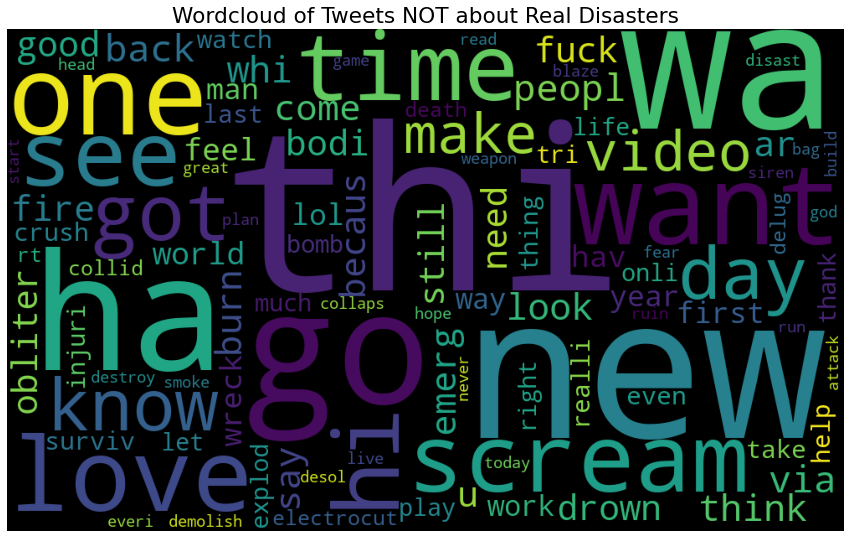

In [15]:
wc = WordCloud(background_color="black", 
               max_words=100, 
               width=1000, 
               height=600,
               font_step=1,
               random_state=1).generate(non_real_disaster_tweets)

plt.figure(figsize=(15,15))
plt.imshow(wc)
plt.axis("off")
plt.title("Wordcloud of Tweets NOT about Real Disasters")
plt.show()